# 6章 学習に関するテクニック


# 復習

4.4.1 勾配法    
学習において最適なパラメータを探索する。
まずは勾配を可視化する。

In [1]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     

No handles with labels found to put in legend.


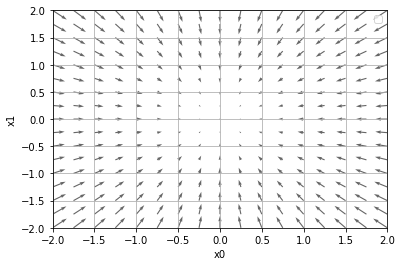

In [3]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

最適なパラメータを探索する。

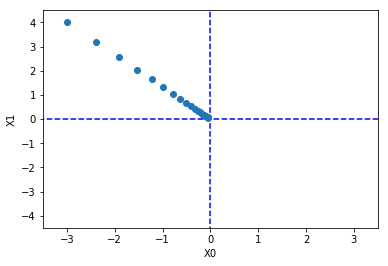

In [14]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_method.py
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x) #傾き算出
        x -= lr * grad #更新部分はここ！！！！！

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# パラメータの更新(2次元)

## SGD

In [21]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_method.py
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, param, grad):
        param -= self.lr * grad
        print("param", param)
        

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x) #傾き算出
        sgd.update(x, grad) #更新部分はここ！！！！！

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

param [-1.8  2.4]
param [-1.08  1.44]
param [-0.648  0.864]
param [-0.3888  0.5184]
param [-0.23328  0.31104]
param [-0.139968  0.186624]
param [-0.0839808  0.1119744]
param [-0.05038848  0.06718464]
param [-0.03023309  0.04031078]
param [-0.01813985  0.02418647]


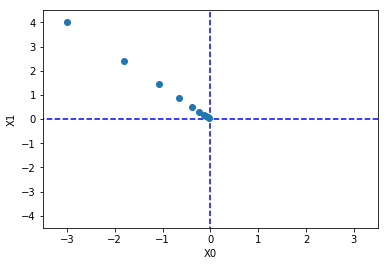

In [27]:
lr = 0.2
# lr = 0.1
step_num = 10
# step_num = 100
sgd = SGD(lr)
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## Momentum SGD

緩急をつける

In [28]:
class Momentum:

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, param, grad):
        if self.v is None:
            self.v = 0
            self.v = np.zeros_like(param)
        
        x1 = self.momentum * self.v
        x2 = self.lr * grad
        print("x1", x1, " x2:", x2)
        self.v = x1 - x2
        print(self.v)
        param += self.v
        print("param", param, " v:",self.v)

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x) #傾き算出
        momentum.update(x, grad) #更新部分はここ！！！！！

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

x1 [0. 0.]  x2: [-0.18  0.24]
[ 0.18 -0.24]
param [-2.82  3.76]  v: [ 0.18 -0.24]
x1 [ 0.162 -0.216]  x2: [-0.1692  0.2256]
[ 0.3312 -0.4416]
param [-2.4888  3.3184]  v: [ 0.3312 -0.4416]
x1 [ 0.29808 -0.39744]  x2: [-0.149328  0.199104]
[ 0.447408 -0.596544]
param [-2.041392  2.721856]  v: [ 0.447408 -0.596544]
x1 [ 0.4026672 -0.5368896]  x2: [-0.12248352  0.16331136]
[ 0.52515072 -0.70020096]
param [-1.51624128  2.02165504]  v: [ 0.52515072 -0.70020096]
x1 [ 0.47263565 -0.63018086]  x2: [-0.09097448  0.1212993 ]
[ 0.56361012 -0.75148017]
param [-0.95263116  1.27017487]  v: [ 0.56361012 -0.75148017]
x1 [ 0.50724911 -0.67633215]  x2: [-0.05715787  0.07621049]
[ 0.56440698 -0.75254264]
param [-0.38822417  0.51763223]  v: [ 0.56440698 -0.75254264]


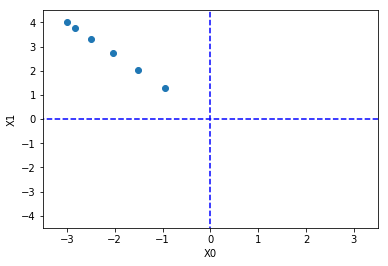

In [31]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_method.py
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
lr = 0.03
step_num = 6
momentum = Momentum(lr)
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# AdaGrad

変数hにより一度更新した場所は学習係数を小さくし初めてみる場所は更新を大きくする。

In [45]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, param, grads):
        if self.h is None:
            self.h = {}
            self.h = np.zeros_like(param)
        
        self.h += grads * grads
        param -= self.lr * grads / (np.sqrt(self.h) + 1e-7)

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x) #傾き算出
        ada_grad.update(x, grad) #更新部分はここ！！！！！

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

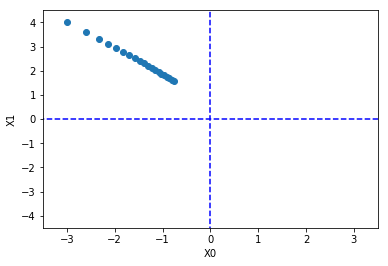

In [46]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_method.py
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
lr = 0.4
step_num = 20
ada_grad = AdaGrad(lr)
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# Adam

AdagradとMomentumの融合

In [47]:
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, param, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            self.m = np.zeros_like(param)
            self.v = np.zeros_like(param)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        self.m += (1 - self.beta1) * (grads - self.m)
        self.v += (1 - self.beta2) * (grads**2 - self.v)

        param -= lr_t * self.m / (np.sqrt(self.v) + 1e-7)

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x) #傾き算出
        ada_grad.update(x, grad) #更新部分はここ！！！！！

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

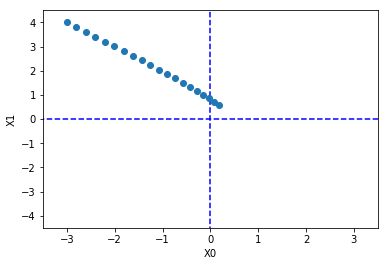

In [52]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_method.py
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
lr = 0.2
step_num = 20
ada_grad = Adam(lr)
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# パラメータの更新(3次元)

やりたいなぁ。。


In [113]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_method.py
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 
        

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x) #傾き算出
        sgd.update(x, grad) #更新部分はここ！！！！！

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

In [114]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_method.py
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
lr = 0.2
step_num = 20
sgd = SGD(lr)
init_x = np.array([-3.0, 4.0])
print(init_x.shape)
# x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

# plt.plot( [-5, 5], [0,0], '--b')
# plt.plot( [0,0], [-5, 5], '--b')
# plt.plot(x_history[:,0], x_history[:,1], 'o')

# plt.xlim(-3.5, 3.5)
# plt.ylim(-4.5, 4.5)
# plt.xlabel("X0")
# plt.ylabel("X1")
# plt.show()

(2,)


# mnist

In [53]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "."
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
           _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み
    
    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label : 
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか 
    
    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


# 2層のニューラルネット

In [54]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    #重みの要素数分まわしてるので　そら重いよ 
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 値を元に戻す

    return grad

In [56]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [58]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

In [59]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


In [60]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [61]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [63]:
iters_num = 5000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
#     grad = network.numerical_gradient(x_batch, t_batch) #めちゃ遅い
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.8065, 0.8108
train acc, test acc | 0.8778333333333334, 0.8825
train acc, test acc | 0.8969833333333334, 0.9008
train acc, test acc | 0.9077, 0.9099
train acc, test acc | 0.9137333333333333, 0.9156
train acc, test acc | 0.9193, 0.9221
train acc, test acc | 0.9232166666666667, 0.9244
train acc, test acc | 0.92765, 0.929


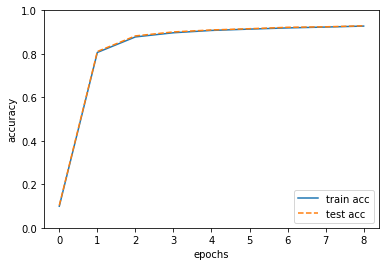

In [64]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_mnist.py

In [ ]:
# def smooth_curve(x):
#     """損失関数のグラフを滑らかにするために用いる
#     参考：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
#     """
#     window_len = 11
#     s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
#     w = np.kaiser(window_len, 2)
#     y = np.convolve(w/w.sum(), s, mode='valid')
# #     print(y)
# #     print(y.shape)
# #     print(len(y))
#     return y

In [87]:
# # print(smooth_curve(train_acc_list).shape)
# print(len(smooth_curve(train_acc_list)[:9]))
# print(len(train_acc_list))
# # train_acc_list
# # test_acc_list

9
9


In [91]:
# x = np.arange(len(train_acc_list))
# print(len(x))
# plt.plot(x, smooth_curve(train_acc_list)[:9], marker="", markevery=100, label="")
# plt.ylim(0, 1)
# plt.legend()
# plt.show()

# 重みの初期化

In [92]:
#https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/weight_init_activation_histogram.py


In [94]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

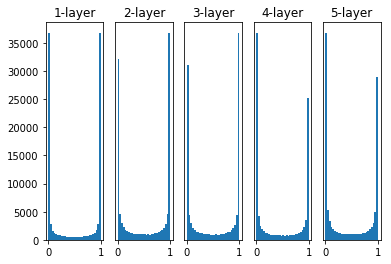

In [110]:
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
#     w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    
    a = np.dot(x, w)
    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
#     z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
#     plt.ylim(0, 1000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [115]:

# # coding: utf-8
# import sys, os
# sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import OrderedDict
# from common.optimizer import *


# def f(x, y):
#     return x**2 / 20.0 + y**2


# def df(x, y):
#     return x / 10.0, 2.0*y

# init_pos = (-7.0, 2.0)
# params = {}
# params['x'], params['y'] = init_pos[0], init_pos[1]
# grads = {}
# grads['x'], grads['y'] = 0, 0


# optimizers = OrderedDict()
# optimizers["SGD"] = SGD(lr=0.95)
# optimizers["Momentum"] = Momentum(lr=0.1)
# optimizers["AdaGrad"] = AdaGrad(lr=1.5)
# optimizers["Adam"] = Adam(lr=0.3)

# idx = 1

# for key in optimizers:
#     optimizer = optimizers[key]
#     x_history = []
#     y_history = []
#     params['x'], params['y'] = init_pos[0], init_pos[1]
    
#     for i in range(30):
#         x_history.append(params['x'])
#         y_history.append(params['y'])
        
#         grads['x'], grads['y'] = df(params['x'], params['y'])
#         optimizer.update(params, grads)
    

#     x = np.arange(-10, 10, 0.01)
#     y = np.arange(-5, 5, 0.01)
    
#     X, Y = np.meshgrid(x, y) 
#     Z = f(X, Y)
    
#     # for simple contour line  
#     mask = Z > 7
#     Z[mask] = 0
    
#     # plot 
#     plt.subplot(2, 2, idx)
#     idx += 1
#     plt.plot(x_history, y_history, 'o-', color="red")
#     plt.contour(X, Y, Z)
#     plt.ylim(-10, 10)
#     plt.xlim(-10, 10)
#     plt.plot(0, 0, '+')
#     #colorbar()
#     #spring()
#     plt.title(key)
#     plt.xlabel("x")
#     plt.ylabel("y")
    
# plt.show()